# Study friend information

This notebook looks at the players friend information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
api_calls_day = pd.Timestamp('2019-06-13')
churn_cutoff = api_calls_day - pd.Timedelta(3,'M')

In [3]:
df = pd.read_csv("player_friend_info_100k.csv",dtype={'steamid': str}).drop("Unnamed: 0", axis='columns')

In [4]:
df = df[pd.to_datetime(df['friend_since'], unit='s') < churn_cutoff]

In [5]:
df.head()

,friend_since,relationship,steamid,steamid_orig
0,1434524498,friend,76561198007070703,76561198199710782
1,1437740667,friend,76561198041503217,76561198199710782
2,1438264541,friend,76561198238259518,76561198199710782
3,1421677696,friend,76561197960448312,76561198049785932
4,1490267324,friend,76561197961426758,76561198049785932


In [6]:
df.tail()

,friend_since,relationship,steamid,steamid_orig
12809033,1430381009,friend,76561198085000180,76561197993657300
12809034,1377253788,friend,76561198104092292,76561197993657300
12809035,1377874220,friend,76561198104117721,76561197993657300
12809036,1429293646,friend,76561198138606214,76561197993657300
12809037,1428864612,friend,76561198181799839,76561197993657300


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12308178 entries, 0 to 12809037
Data columns (total 4 columns):
friend_since    int64
relationship    object
steamid         object
steamid_orig    int64
dtypes: int64(2), object(2)
memory usage: 469.5+ MB


In [8]:
df['steamid'].nunique()

5893633

In [9]:
df['steamid_orig'].nunique()

85357

In [10]:
df['relationship'].nunique()

1

In [11]:
df = df.drop('relationship',axis='columns')

In [12]:
df['Root'] = (df['steamid_orig'] == 76561197960434622)

In [13]:
df.head()

,friend_since,steamid,steamid_orig,Root
0,1434524498,76561198007070703,76561198199710782,False
1,1437740667,76561198041503217,76561198199710782,False
2,1438264541,76561198238259518,76561198199710782,False
3,1421677696,76561197960448312,76561198049785932,False
4,1490267324,76561197961426758,76561198049785932,False


In [14]:
df.tail()

,friend_since,steamid,steamid_orig,Root
12809033,1430381009,76561198085000180,76561197993657300,False
12809034,1377253788,76561198104092292,76561197993657300,False
12809035,1377874220,76561198104117721,76561197993657300,False
12809036,1429293646,76561198138606214,76561197993657300,False
12809037,1428864612,76561198181799839,76561197993657300,False


In [15]:
First_tier = list(df[df['Root']]['steamid'])

In [16]:
df['First_tier'] = df['steamid_orig'].apply(lambda x: x in First_tier)

In [17]:
Second_tier = list(df[df['First_tier']]['steamid'])

In [18]:
df['Second_tier'] = df['steamid_orig'].apply(lambda x: x in Second_tier)

In [19]:
df['Third_tier'] = ((~df['Second_tier']) & (~df['First_tier']))

In [20]:
df[df['Third_tier']]

,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
0,1434524498,76561198007070703,76561198199710782,False,False,False,True
1,1437740667,76561198041503217,76561198199710782,False,False,False,True
2,1438264541,76561198238259518,76561198199710782,False,False,False,True
3,1421677696,76561197960448312,76561198049785932,False,False,False,True
4,1490267324,76561197961426758,76561198049785932,False,False,False,True
5,1325249260,76561197976043102,76561198049785932,False,False,False,True
6,1475218672,76561197981701458,76561198049785932,False,False,False,True
7,1512432835,76561197988116824,76561198049785932,False,False,False,True
8,1464167294,76561197994645449,76561198049785932,False,False,False,True
9,1444836125,76561197996994277,76561198049785932,False,False,False,True


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df_num_Friends = (df.groupby('steamid_orig').count()['steamid']).to_frame()

In [23]:
df_num_Friends = df_num_Friends.reset_index()

In [24]:
df_num_Friends['num_Friends'] = df_num_Friends['steamid']

In [25]:
df_num_Friends[df_num_Friends['steamid_orig'] == 76561197960434622]

,steamid_orig,steamid,num_Friends
498,76561197960434622,174,174


In [26]:
df_num_Friends = df_num_Friends.drop('steamid',axis='columns')

In [27]:
df_num_Friends['steamid'] = df_num_Friends['steamid_orig']

In [28]:
df_num_Friends = df_num_Friends.drop('steamid_orig',axis='columns')

In [29]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,174,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [85]:
df_max = df.loc[df.groupby('steamid_orig')['friend_since'].idxmax()]

In [86]:
df_max = df_max.reset_index()

In [87]:
df_max.head()

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
0,5616118,1455906659,76561198018064800,76561197960265730,False,False,False,True
1,5119362,1534046531,76561198105633837,76561197960265731,False,False,False,True
2,6366238,1498068231,76561197972491988,76561197960265733,False,False,False,True
3,5043230,1548739620,76561198262909170,76561197960265738,False,False,False,True
4,5038909,1534367618,76561198348711414,76561197960265743,False,False,False,True


In [88]:
df_max[df_max['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
498,5035903,1545543929,76561197994308495,76561197960434622,True,False,False,True


In [89]:
df_max['newest_friend_time'] = df_max['friend_since']

In [90]:
df_max['newest_friend_steamid'] = df_max['steamid']

In [91]:
df_max = df_max.drop(['index','friend_since','steamid'],axis='columns')
df_max.head()

,steamid_orig,Root,First_tier,Second_tier,Third_tier,newest_friend_time,newest_friend_steamid
0,76561197960265730,False,False,False,True,1455906659,76561198018064800
1,76561197960265731,False,False,False,True,1534046531,76561198105633837
2,76561197960265733,False,False,False,True,1498068231,76561197972491988
3,76561197960265738,False,False,False,True,1548739620,76561198262909170
4,76561197960265743,False,False,False,True,1534367618,76561198348711414


In [92]:
df_max['steamid'] = df_max['steamid_orig']
df_max = df_max.drop('steamid_orig',axis='columns')
df_max.head()

,Root,First_tier,Second_tier,Third_tier,newest_friend_time,newest_friend_steamid,steamid
0,False,False,False,True,1455906659,76561198018064800,76561197960265730
1,False,False,False,True,1534046531,76561198105633837,76561197960265731
2,False,False,False,True,1498068231,76561197972491988,76561197960265733
3,False,False,False,True,1548739620,76561198262909170,76561197960265738
4,False,False,False,True,1534367618,76561198348711414,76561197960265743


In [93]:
df_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85357 entries, 0 to 85356
Data columns (total 7 columns):
Root                     85357 non-null bool
First_tier               85357 non-null bool
Second_tier              85357 non-null bool
Third_tier               85357 non-null bool
newest_friend_time       85357 non-null int64
newest_friend_steamid    85357 non-null object
steamid                  85357 non-null int64
dtypes: bool(4), int64(2), object(1)
memory usage: 2.3+ MB


In [94]:
df_max.nunique()

Root                         2
First_tier                   1
Second_tier                  1
Third_tier                   1
newest_friend_time       84331
newest_friend_steamid    79071
steamid                  85357
dtype: int64

In [95]:
df_min = df.loc[df.groupby('steamid_orig')['friend_since'].idxmin()]

In [96]:
df_min = df_min.reset_index()

In [97]:
df_min.head()

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
0,5616116,1347313517,76561197974593417,76561197960265730,False,False,False,True
1,5119192,0,76561197960265733,76561197960265731,False,False,False,True
2,6366204,0,76561197960265731,76561197960265733,False,False,False,True
3,5043142,0,76561197960265731,76561197960265738,False,False,False,True
4,5038844,0,76561197960265737,76561197960265743,False,False,False,True


In [98]:
df_min[df_min['steamid_orig'] == 76561197960434622]

,index,friend_since,steamid,steamid_orig,Root,First_tier,Second_tier,Third_tier
498,5035800,0,76561197960408176,76561197960434622,True,False,False,True


In [99]:
df_min['oldest_friend_time'] = df_min['friend_since']

In [100]:
df_min['oldest_friend_steamid'] = df_min['steamid']

In [101]:
df_min = df_min.drop(['index','friend_since','steamid'],axis='columns')
df_min.head()

,steamid_orig,Root,First_tier,Second_tier,Third_tier,oldest_friend_time,oldest_friend_steamid
0,76561197960265730,False,False,False,True,1347313517,76561197974593417
1,76561197960265731,False,False,False,True,0,76561197960265733
2,76561197960265733,False,False,False,True,0,76561197960265731
3,76561197960265738,False,False,False,True,0,76561197960265731
4,76561197960265743,False,False,False,True,0,76561197960265737


In [102]:
df_min['steamid'] = df_min['steamid_orig']
df_min = df_min.drop('steamid_orig',axis='columns')
df_min.head()

df_min.info()

df_min.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85357 entries, 0 to 85356
Data columns (total 7 columns):
Root                     85357 non-null bool
First_tier               85357 non-null bool
Second_tier              85357 non-null bool
Third_tier               85357 non-null bool
oldest_friend_time       85357 non-null int64
oldest_friend_steamid    85357 non-null object
steamid                  85357 non-null int64
dtypes: bool(4), int64(2), object(1)
memory usage: 2.3+ MB


Root                         2
First_tier                   1
Second_tier                  1
Third_tier                   1
oldest_friend_time       71214
oldest_friend_steamid    78570
steamid                  85357
dtype: int64

In [103]:
df_max.head()

,Root,First_tier,Second_tier,Third_tier,newest_friend_time,newest_friend_steamid,steamid
0,False,False,False,True,1455906659,76561198018064800,76561197960265730
1,False,False,False,True,1534046531,76561198105633837,76561197960265731
2,False,False,False,True,1498068231,76561197972491988,76561197960265733
3,False,False,False,True,1548739620,76561198262909170,76561197960265738
4,False,False,False,True,1534367618,76561198348711414,76561197960265743


In [104]:
df_min.head()

,Root,First_tier,Second_tier,Third_tier,oldest_friend_time,oldest_friend_steamid,steamid
0,False,False,False,True,1347313517,76561197974593417,76561197960265730
1,False,False,False,True,0,76561197960265733,76561197960265731
2,False,False,False,True,0,76561197960265731,76561197960265733
3,False,False,False,True,0,76561197960265731,76561197960265738
4,False,False,False,True,0,76561197960265737,76561197960265743


In [105]:
df_friend_extremes = df_max.merge(df_min,on=['steamid'],suffixes=('_max', '_min'))

In [106]:
df_friend_extremes[df_friend_extremes['Root_max'] != df_friend_extremes['Root_min']]

,Root_max,First_tier_max,Second_tier_max,Third_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,Third_tier_min,oldest_friend_time,oldest_friend_steamid


In [107]:
df_friend_extremes[df_friend_extremes['First_tier_max'] != df_friend_extremes['First_tier_min']]

,Root_max,First_tier_max,Second_tier_max,Third_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,Third_tier_min,oldest_friend_time,oldest_friend_steamid


In [108]:
df_friend_extremes[df_friend_extremes['Second_tier_max'] != df_friend_extremes['Second_tier_min']]

,Root_max,First_tier_max,Second_tier_max,Third_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,Third_tier_min,oldest_friend_time,oldest_friend_steamid


In [109]:
df_friend_extremes.head()

,Root_max,First_tier_max,Second_tier_max,Third_tier_max,newest_friend_time,newest_friend_steamid,steamid,Root_min,First_tier_min,Second_tier_min,Third_tier_min,oldest_friend_time,oldest_friend_steamid
0,False,False,False,True,1455906659,76561198018064800,76561197960265730,False,False,False,True,1347313517,76561197974593417
1,False,False,False,True,1534046531,76561198105633837,76561197960265731,False,False,False,True,0,76561197960265733
2,False,False,False,True,1498068231,76561197972491988,76561197960265733,False,False,False,True,0,76561197960265731
3,False,False,False,True,1548739620,76561198262909170,76561197960265738,False,False,False,True,0,76561197960265731
4,False,False,False,True,1534367618,76561198348711414,76561197960265743,False,False,False,True,0,76561197960265737


In [110]:
df_friend_extremes['Root'] = df_friend_extremes['Root_max']
df_friend_extremes['First_tier'] = df_friend_extremes['First_tier_max']
df_friend_extremes['Second_tier'] = df_friend_extremes['Second_tier_max']
df_friend_extremes['Third_tier'] = df_friend_extremes['Third_tier_max']
df_friend_extremes = df_friend_extremes.drop(['Root_max','Root_min','First_tier_max','First_tier_min','Second_tier_max','Second_tier_min','Third_tier_max','Third_tier_min'],axis='columns')

In [111]:
df_friend_extremes.head()

,newest_friend_time,newest_friend_steamid,steamid,oldest_friend_time,oldest_friend_steamid,Root,First_tier,Second_tier,Third_tier
0,1455906659,76561198018064800,76561197960265730,1347313517,76561197974593417,False,False,False,True
1,1534046531,76561198105633837,76561197960265731,0,76561197960265733,False,False,False,True
2,1498068231,76561197972491988,76561197960265733,0,76561197960265731,False,False,False,True
3,1548739620,76561198262909170,76561197960265738,0,76561197960265731,False,False,False,True
4,1534367618,76561198348711414,76561197960265743,0,76561197960265737,False,False,False,True


In [112]:
df_num_Friends.head()

,num_Friends,steamid
0,9,76561197960265730
1,174,76561197960265731
2,70,76561197960265733
3,91,76561197960265738
4,66,76561197960265743


In [113]:
df_friend_extremes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85357 entries, 0 to 85356
Data columns (total 9 columns):
newest_friend_time       85357 non-null int64
newest_friend_steamid    85357 non-null object
steamid                  85357 non-null int64
oldest_friend_time       85357 non-null int64
oldest_friend_steamid    85357 non-null object
Root                     85357 non-null bool
First_tier               85357 non-null bool
Second_tier              85357 non-null bool
Third_tier               85357 non-null bool
dtypes: bool(4), int64(3), object(2)
memory usage: 4.2+ MB


In [114]:
df_num_Friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85357 entries, 0 to 85356
Data columns (total 2 columns):
num_Friends    85357 non-null int64
steamid        85357 non-null int64
dtypes: int64(2)
memory usage: 1.3 MB


In [115]:
df_friend_summary = df_num_Friends.merge(df_friend_extremes,on='steamid')

In [116]:
df_friend_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85357 entries, 0 to 85356
Data columns (total 10 columns):
num_Friends              85357 non-null int64
steamid                  85357 non-null int64
newest_friend_time       85357 non-null int64
newest_friend_steamid    85357 non-null object
oldest_friend_time       85357 non-null int64
oldest_friend_steamid    85357 non-null object
Root                     85357 non-null bool
First_tier               85357 non-null bool
Second_tier              85357 non-null bool
Third_tier               85357 non-null bool
dtypes: bool(4), int64(4), object(2)
memory usage: 4.9+ MB


In [117]:
df_friend_summary.head()

,num_Friends,steamid,newest_friend_time,newest_friend_steamid,oldest_friend_time,oldest_friend_steamid,Root,First_tier,Second_tier,Third_tier
0,9,76561197960265730,1455906659,76561198018064800,1347313517,76561197974593417,False,False,False,True
1,174,76561197960265731,1534046531,76561198105633837,0,76561197960265733,False,False,False,True
2,70,76561197960265733,1498068231,76561197972491988,0,76561197960265731,False,False,False,True
3,91,76561197960265738,1548739620,76561198262909170,0,76561197960265731,False,False,False,True
4,66,76561197960265743,1534367618,76561198348711414,0,76561197960265737,False,False,False,True


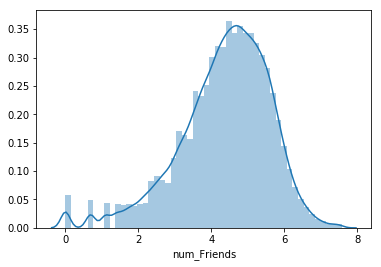

In [118]:
sns.distplot(np.log(df_friend_summary['num_Friends']))

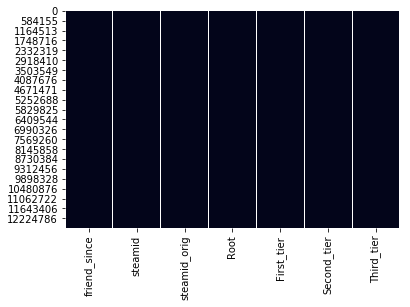

In [119]:
sns.heatmap(df.isnull(), cbar=False)

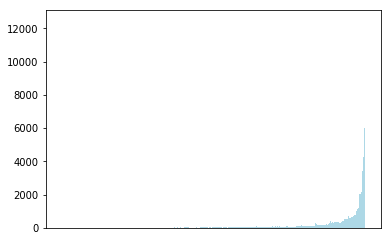

In [120]:
import datetime
# plot it
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['newest_friend_time'] > 1]['newest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

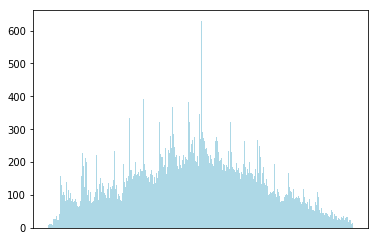

In [121]:
fig, ax = plt.subplots(1,1)
ax.hist(df_friend_summary[df_friend_summary['oldest_friend_time'] > 1]['oldest_friend_time'], bins=500, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [122]:
df_friend_summary.to_csv('100k_friend_summary.csv')

In [123]:
df_friend_summary['newest_friend_time'].max()

1552494760

In [124]:
pd.to_datetime(1552494489,unit='s')

Timestamp('2019-03-13 16:28:09')